### 📘 **Лінійне програмування та RandomForestRegressor**  
#### Лабораторна робота

---

### 🧠 Теорія: Метод лінійного програмування
Лінійне програмування — це метод оптимізації, що дозволяє знаходити найкраще рішення при наявності обмежень.

Ціль: **максимізувати або мінімізувати** цільову функцію `Z = c1*x1 + c2*x2 + ... + cn*xn`

Обмеження:  

a11*x1 + a12*x2 + ... + a1n*xn <= b1  
...  
am1*x1 + am2*x2 + ... + amn*xn <= bm  
x1, x2, ..., xn >= 0

Методи розв’язку:
- Графічний метод (для 2 змінних)
- Симплекс-метод
- Метод внутрішніх точок

### 🔧 Практика: приклад лінійного програмування (SciPy)

In [4]:
from scipy.optimize import linprog

# Коефіцієнти цільової функції (мінімізуємо -Z)
c = [-50, -80]

# Матриця обмежень (ліва частина)
A = [
    [2, 4],  # години
    [3, 2]   # сировина
]

# Вектор обмежень (права частина)
b = [100, 120]

# Межі змінних (не від'ємні)
x_bounds = (0, None)
y_bounds = (0, None)

# Розв’язання
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

if result.success:
    x, y = result.x
    print(f"Оптимальна кількість товару x: {x:.2f}, y: {y:.2f}")
    print(f"Максимальний прибуток: {abs(result.fun):.2f} грн")
else:
    print("Розв’язок не знайдено.")

Оптимальна кількість товару x: 35.00, y: 7.50
Максимальний прибуток: 2350.00 грн


### 🌲 RandomForestRegressor: теорія

```markdown
RandomForestRegressor — це ансамблевий метод для регресії, який об'єднує багато дерев рішень:

- Кожне дерево навчається на випадковій частині даних (бутстреп).
- Кожен вузол дерева бачить випадковий набір ознак.
- Підсумковий прогноз — це середнє по всіх деревах.

✅ Переваги:
- Зменшує перенавчання
- Може моделювати складні залежності
- Не чутливий до викидів
```

---

### ⚙️ Практика: RandomForestRegressor

In [5]:
%pip install pandas numpy matplotlib scikit-learn scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Завантаження даних
db = load_diabetes()
X = np.array(db.data)
y = np.array(db.target)

print(f"Data shape: X={X.shape}, y={y.shape}")

# Поділ на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Параметри моделі
n_estimators = 100
max_depth = 6
max_features = 3

# Навчання моделі
rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, random_state=42)
rf.fit(X_train, y_train)

# Прогноз
predictions = rf.predict(X_test)

# Оцінка якості
mse = mean_squared_error(y_test, predictions)
print(f"Середньоквадратична помилка (MSE): {mse:.4f}")

Note: you may need to restart the kernel to use updated packages.
Data shape: X=(442, 10), y=(442,)
Середньоквадратична помилка (MSE): 2772.4419


### 📊 Візуалізація результату

Note: you may need to restart the kernel to use updated packages.


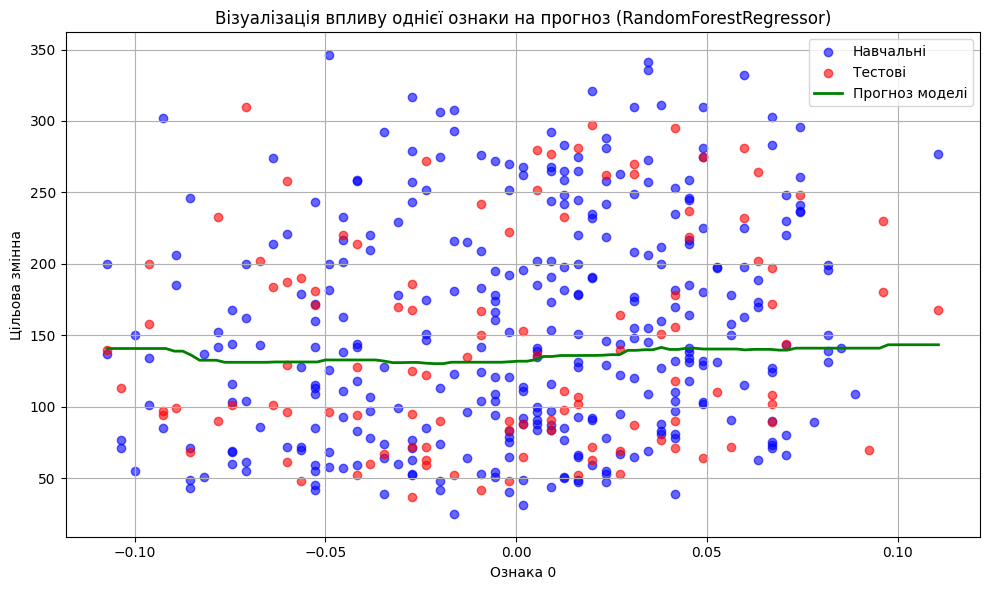

In [6]:
# Встановлення scipy, якщо ще не встановлено
%pip install -q scipy

import numpy as np
import matplotlib.pyplot as plt

# Вибираємо індекс ознаки, яку хочемо візуалізувати
f = 0  # можна змінити на будь-який індекс від 0 до X.shape[1] - 1

# Створення сітки значень для ознаки f
X_grid = np.linspace(np.min(X[:, f]), np.max(X[:, f]), 100).reshape(-1, 1)

# Створюємо базову точку — середні значення по всіх ознаках
X_base = np.mean(X, axis=0)

# Створюємо копії цього базового вектора, щоб замінювати лише одну фічу
X_full_grid = np.tile(X_base, (len(X_grid), 1))

# Змінюємо лише ознаку f
X_full_grid[:, f] = X_grid[:, 0]

# Отримуємо прогноз моделі
y_grid_pred = rf.predict(X_full_grid)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, f], y_train, label="Навчальні", alpha=0.6, color='blue')
plt.scatter(X_test[:, f], y_test, label="Тестові", alpha=0.6, color='red')
plt.plot(X_grid, y_grid_pred, label="Прогноз моделі", color='green', linewidth=2)

plt.xlabel(f"Ознака {f}")
plt.ylabel("Цільова змінна")
plt.title("Візуалізація впливу однієї ознаки на прогноз (RandomForestRegressor)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Висновок

Побудовано базові графіки з використанням бібліотеки matplotlib. Проведено аналіз випадкових величин, їх розподілу, побудовано гістограму та комбіновану візуалізацію декількох функцій.